# Exercise 01: Regression of Housing Data

- We'll use the simple Boston house prices set, available in scikit-learn.
- This records measurements of 13 attributes of housing markets around Boston, as well as the median price.
- The question is: can you predict the price of a new market given its attributes?

##  Loading dataset and quick overview

In [1]:
import numpy as np
from sklearn.datasets import load_boston
data = load_boston()
print(data.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR'])


In [2]:
# We can see that there are just over 500 data points:
print(data.data.shape)
print(data.target.shape)

(506, 13)
(506,)


In [3]:
# The ``DESCR`` variable has a long description of the dataset:
print(data.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

## Predicting Home Prices: a Simple Linear Regression

In [4]:
'''Perform any data transformation here'''
# For example:
data.data = [np.hstack([data.data[i],np.sqrt(data.data[i]),np.log(data.data[i]+1)]) for i in range(data.data.shape[0])]

In [5]:
# split the whole dataset into training and testing
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
# import needed models in scikit-learn by yourself
# and fit a linear model using training dataset
from sklearn.linear_model import LinearRegression
model = LinearRegression()
#model = '''train a linear model using training dataset here'''
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [7]:
# make prediction here
# y_pred = '''make prediction on testing dataset here'''
y_pred = model.predict(X_test)

RMS: 3.9151961132


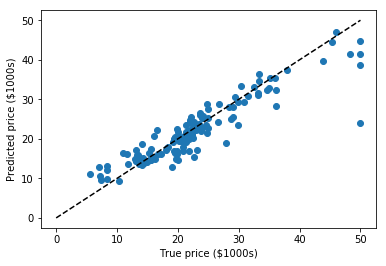

In [8]:
# visualize the result
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(y_test, y_pred)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
print("RMS:", np.sqrt(np.mean((y_pred - y_test) ** 2)))

### Exercise
- Try other transformation on data
- When do we need to add regularization?

In [9]:
# import needed models in scikit-learn by yourself
# and fit a linear model using training dataset
from sklearn.linear_model import Lasso
model = Lasso(alpha=0.0001)
#model = '''train a linear model using training dataset here'''
model.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

RMS: 3.94951242553


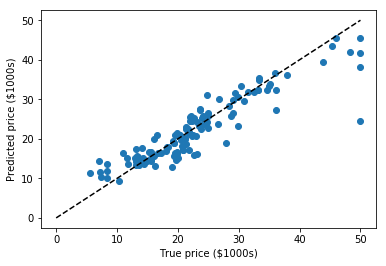

In [10]:
y_pred = model.predict(X_test)
# visualize the result
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(y_test, y_pred)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
print("RMS:", np.sqrt(np.mean((y_pred - y_test) ** 2)))